In [2]:
import os
import pickle
import datetime

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

from category_encoders import OneHotEncoder

In [3]:
# read the data sets
df = pd.read_csv('../data/clean_HR_Analytics2.csv')

#### Split the Data

In [4]:
# vertical split
target = "Attrition"
X = df.drop(columns=target)
y = df[target]

# split training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Build Model

#####   Baseline Model

In [5]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy: ", round(baseline_accuracy, 2))

Baseline Accuracy:  0.83


#### Iterate

In [6]:
# Instantiate the model
model = make_pipeline(

    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(max_iter=10000)
)

# fit the training set
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MaritalStatus', 'OverTime'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=10000))])

#### Evaluate the model

In [7]:
# training and test accuracy scores of the model
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = model.score(X_test, y_test)

print("Training Accuracy: ", round(train_acc, 2))
print("Test Accuracy: ", round(test_acc, 2))

Training Accuracy:  0.86
Test Accuracy:  0.87


#### Plot Confusion Matrix

In [8]:
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[248,   7],
       [ 30,   9]])

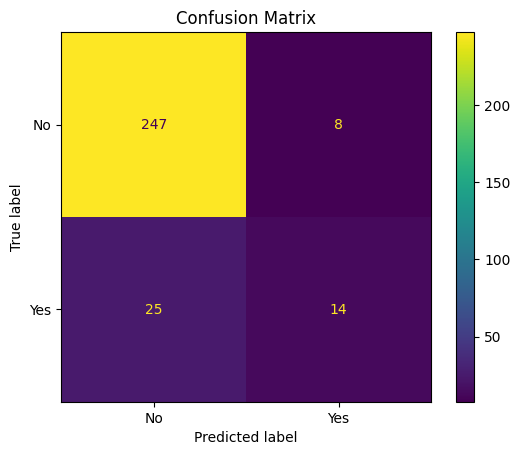

In [47]:
# Create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# plot the confusion matrix
cm_display.plot() 
plt.title("Confusion Matrix");
plt.savefig('../reports/confusion_matrix_LR.jpg')

#### Communicate

In [34]:
coefficient = model.named_steps["logisticregression"].coef_[0]
feature_names = model.named_steps["onehotencoder"].get_feature_names()

weight_df = pd.Series(coefficient, index=feature_names).sort_values()

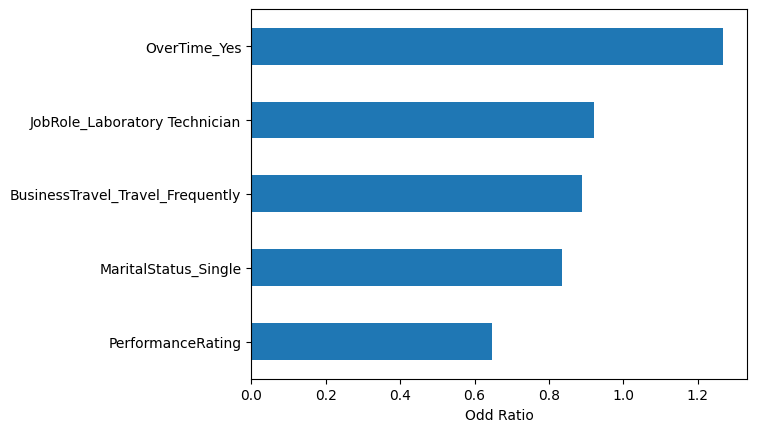

In [15]:
# plot largest coefficient
weight_df.tail(5).plot(kind="barh")
plt.xlabel("Odd Ratio");

#### Save the Model

In [31]:
timestamp = pd.Timestamp.now().replace(microsecond=0).isoformat()
file_path = os.path.join('../models', f'{timestamp}_LR.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(model, f)